In [1]:
import sys

import pathlib

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn
import librosa

sys.path.append("./../")
from bowel.data.preprocessing import load_labels_from_txt_files

seaborn.set_theme()

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
plt.rc('xtick', labelsize=14)
plt.rc('ytick', labelsize=14)
plt.rc('axes', labelsize=16, titlesize=18)

In [4]:
files_dir = pathlib.Path("./../data/raw")
txt_files = list(files_dir.glob("*.txt"))
n_txt_files = len(list(txt_files))

In [5]:
print(f"There are {n_txt_files} audio recordings. They come from {n_txt_files} patients.")

There are 18 audio recordings. They come from 18 patients.


In [6]:
files = load_labels_from_txt_files(files_dir)

Processing ../data/raw/malina-M200521-6-2-S.txt
Processing ../data/raw/pigwa-M6-201111-000_201122-S.txt
Processing ../data/raw/poziomka-REVISED-annotation20200711-from-3-200311.txt
Processing ../data/raw/agrest-M200516-1-2-part20210122.txt
Processing ../data/raw/truskawka-M200505-1-1-S.txt
Processing ../data/raw/jagoda-M200606-8-2-S.txt
Processing ../data/raw/gruszka-M200505-2-1-fragment.txt
Processing ../data/raw/poziomka-M200311-3-0-S.txt
Processing ../data/raw/brzoskwinia-M200505-6-1-part20210325.txt
Processing ../data/raw/porzeczka-M200507-6-0-S.txt
Processing ../data/raw/borowka-M8-201102-000_201103-part20210123.txt
Processing ../data/raw/sliwka-M200606-2-2-S.txt
Processing ../data/raw/jablko-M200516-2-2-S.txt
Processing ../data/raw/mango-M200505-4-2-S.txt
Processing ../data/raw/czeresnia-M1-201127-000_201128-part20210326.txt
Processing ../data/raw/annotation-shortened-1405.txt
Processing ../data/raw/pomelo-20210310-part20210325-2.txt
Processing ../data/raw/morela-M200613-6-2-S.tx

## Label based EDA

In [7]:
all_labels = pd.concat(files)

In [8]:
all_labels.dtypes

start       float64
end         float64
freq_beg    float64
freq_end    float64
dtype: object

In [9]:
all_labels

start       end     freq_beg  \
file_name                file_index                                    
malina-M200521-6-2-S.txt 0           0.097653  0.115263  1326.409546   
                         1           2.785512  2.803121  1005.934692   
                         2           2.862353  2.876761  1412.903198   
                         3           2.896772  2.911180  1388.723999   
                         4           2.979217  2.991223  1451.612915   
...                                       ...       ...          ...   
morela-M200613-6-2-S.txt 51          5.418314  5.437345   158.450699   
                         52          5.480958  5.499989   147.887329   
                         53          5.634793  5.653824   221.830978   
                         54          5.658582  5.678406   126.760559   
                         55          5.870303  5.887748   126.760559   

                                        freq_end  
file_name                file_index               
malina-M200521-6-2-S.txt 0           2652.819092  
                         1           2875.371094  
                         2           2941.935547  
                         3           2581.602295  
                         4           2748.387207  
...                                          ...  
morela-M200613-6-2-S.txt 51           306.338013  
                         52           623.239441  
                         53           961.267578  
                         54           697.183105  
                         55           433.098572  

[5341 rows x 4 columns]

In [10]:
all_labels["duration"] = all_labels["end"] - all_labels["start"]

In [11]:
all_labels["duration"]

file_name                 file_index
malina-M200521-6-2-S.txt  0             0.017610
                          1             0.017609
                          2             0.014408
                          3             0.014408
                          4             0.012006
                                          ...   
morela-M200613-6-2-S.txt  51            0.019031
                          52            0.019031
                          53            0.019031
                          54            0.019824
                          55            0.017445
Name: duration, Length: 5341, dtype: float64

In [12]:
for file in txt_files:
    print(file.name)
    print(all_labels.loc[file.name].sort_values("duration", ascending=False)[:5])

malina-M200521-6-2-S.txt
                start        end     freq_beg     freq_end  duration
file_index                                                          
34          12.231438  12.254650  1587.096680  2738.709717  0.023212
11           5.537405   5.555015  1354.838623  2777.419434  0.017610
0            0.097653   0.115263  1326.409546  2652.819092  0.017610
33          12.206624  12.224234  1616.129150  2748.387207  0.017610
27           9.156169   9.173778  1393.548340  2777.419434  0.017609
pigwa-M6-201111-000_201122-S.txt
                start        end    freq_beg     freq_end  duration
file_index                                                         
105         18.900480  18.951836  223.300964   728.155334  0.051356
42           9.232781   9.282532  252.427185  1825.242676  0.049751
32           8.655030   8.691942  281.553406   844.660156  0.036912
99          17.659920  17.693622  233.009705   766.990295  0.033702
57          10.396307  10.426800  233.009705   621.

In [13]:
all_labels.loc[txt_files[1].name]

,start,end,freq_beg,freq_end,duration
file_index,,,,,
0,0.666018,0.685277,456.310669,844.660156,0.019259
1,1.519806,1.542274,398.058228,660.194214,0.022468
2,1.651405,1.667453,398.058228,941.747559,0.016048
3,1.933861,1.949909,436.893219,1640.776611,0.016048
4,2.911223,2.925667,330.097107,601.941772,0.014444
...,...,...,...,...,...
102,18.484820,18.497659,271.844666,990.291260,0.012839
103,18.733574,18.760857,271.844666,669.902893,0.027283
104,18.836285,18.858753,203.883484,2417.475586,0.022468


In [14]:
sounds_in_files = []
for idx, file in enumerate(files):
    n_sounds = file.shape[0]
    sounds_in_files.append(n_sounds)
    print(f"{idx:2}:File {file.index[0][0]} has {n_sounds} sounds identified")

 0:File malina-M200521-6-2-S.txt has 44 sounds identified
 1:File pigwa-M6-201111-000_201122-S.txt has 107 sounds identified
 2:File poziomka-REVISED-annotation20200711-from-3-200311.txt has 1067 sounds identified
 3:File agrest-M200516-1-2-part20210122.txt has 402 sounds identified
 4:File truskawka-M200505-1-1-S.txt has 40 sounds identified
 5:File jagoda-M200606-8-2-S.txt has 75 sounds identified
 6:File gruszka-M200505-2-1-fragment.txt has 116 sounds identified
 7:File poziomka-M200311-3-0-S.txt has 38 sounds identified
 8:File brzoskwinia-M200505-6-1-part20210325.txt has 236 sounds identified
 9:File porzeczka-M200507-6-0-S.txt has 51 sounds identified
10:File borowka-M8-201102-000_201103-part20210123.txt has 401 sounds identified
11:File sliwka-M200606-2-2-S.txt has 57 sounds identified
12:File jablko-M200516-2-2-S.txt has 52 sounds identified
13:File mango-M200505-4-2-S.txt has 113 sounds identified
14:File czeresnia-M1-201127-000_201128-part20210326.txt has 222 sounds identifie

<AxesSubplot:ylabel='Frequency'>

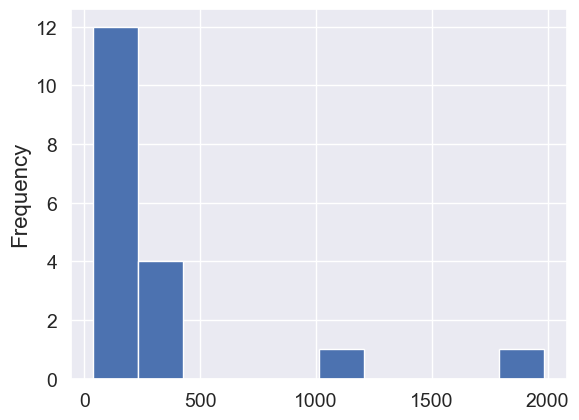

In [15]:
pd.Series(sounds_in_files).plot.hist()

In [16]:
pd.Series(sounds_in_files).sort_values()

7       38
4       40
0       44
9       51
12      52
17      56
11      57
5       75
1      107
13     113
6      116
14     222
8      236
16     280
10     401
3      402
2     1067
15    1984
dtype: int64

In [17]:
wav_files = [file.with_suffix(".wav") for file in txt_files]

In [18]:
durations = []
for file in wav_files:
    durations.append(librosa.get_duration(filename=file, sr=44_100))

In [19]:
pd.Series(durations)

0      16.841134
1      19.276009
2     238.970159
3     701.766508
4      21.791882
5      30.891088
6     103.589116
7      19.122857
8     302.849274
9      23.372902
10    360.063855
11     16.005601
12     46.184490
13      6.562381
14    158.829683
15    855.217052
16     63.178776
17      5.948798
dtype: float64

## Audio files length histogram

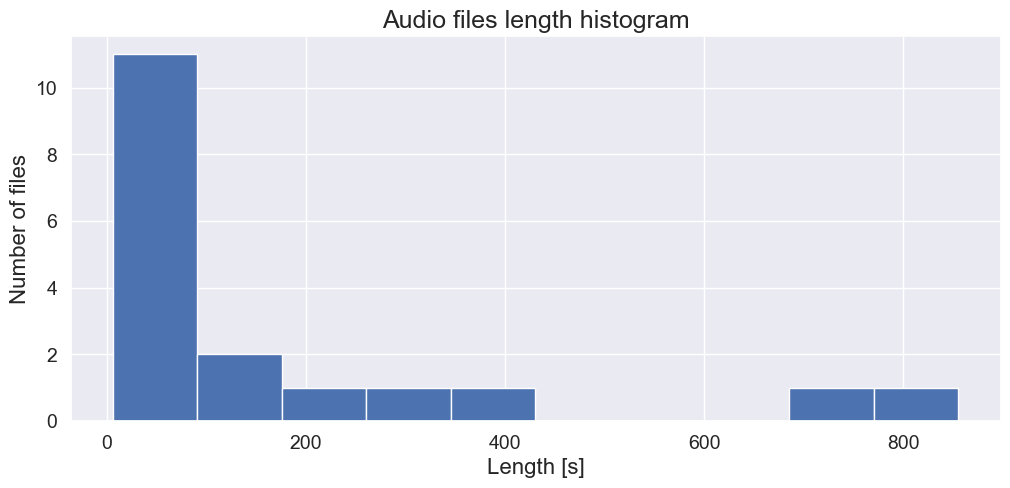

In [20]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Audio files length histogram")
axes.set_ylabel("Number of files")
axes.set_xlabel("Length [s]")
pd.Series(durations).hist(ax=axes)
plt.savefig("./audio_file_length.jpg", dpi=300)

## Number of bowel sounds per audio file

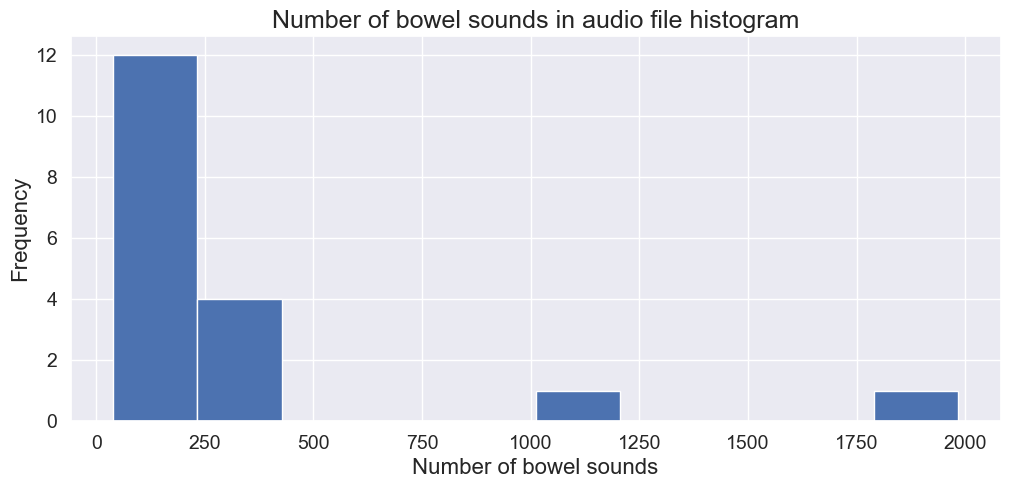

In [21]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Number of bowel sounds in audio file histogram")
axes.set_ylabel("Number of files")
axes.set_xlabel("Number of bowel sounds")
pd.Series(sounds_in_files).plot.hist(ax=axes)
plt.savefig("./number_of_bs.jpg", dpi=300)

## Number of bowel sounds per second in audio histogram

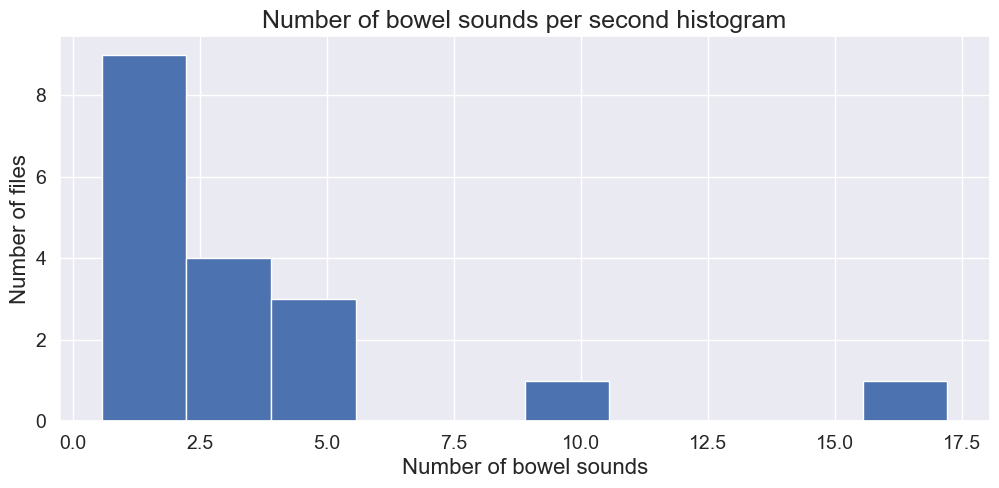

In [22]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Number of bowel sounds per second histogram")
axes.set_ylabel("Number of files")
axes.set_xlabel("Number of bowel sounds")
(pd.Series(sounds_in_files) / pd.Series(durations)).hist()
plt.savefig("./bs_number_density.jpg", dpi=300)

## Bowel sounds density histogram

In [23]:
#bowel sounds length / total length
bowel_durations = []
for file in files:
    file["duration"] = file["end"] - file["start"]
    bowel_durations.append(file["duration"].sum())

ratios = []
for bowel_duration, total_len in zip(bowel_durations, durations):
    ratios.append(bowel_duration/total_len)

In [24]:
print(pd.Series(ratios) * 100)

0      3.887820
1     11.639328
2     13.810873
3      1.344068
4      3.781583
5      8.354717
6      1.952314
7      3.670247
8      1.519807
9      4.934449
10     2.437221
11     6.359099
12     2.202748
13    30.540699
14     2.619600
15    15.626049
16     9.246836
17    19.874737
dtype: float64


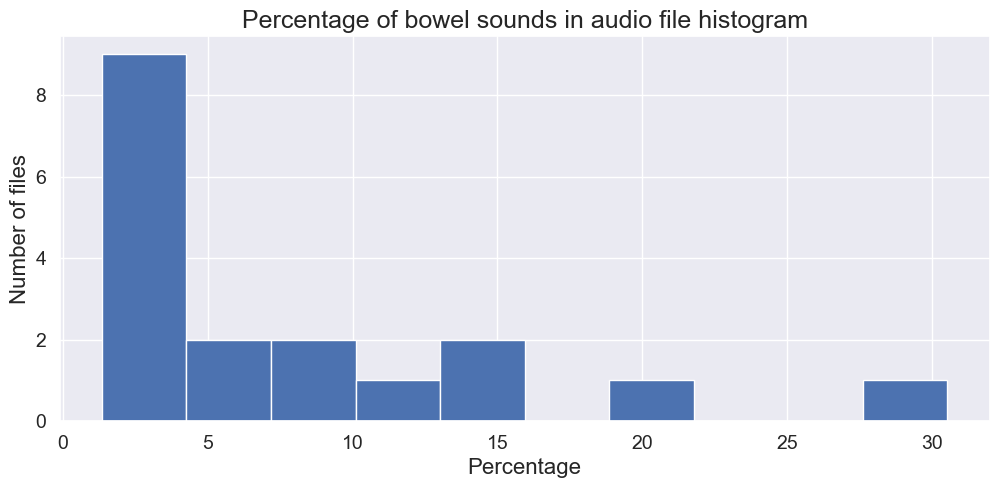

In [25]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Percentage of bowel sounds in audio file histogram")
axes.set_ylabel("Number of files")
axes.set_xlabel("Percentage")
(pd.Series(ratios)*100).hist()
plt.savefig("./bs_density.jpg", dpi=300)

## Average bowel sound length


In [26]:
np.sum(all_labels.duration<.1) / all_labels.shape[0]

0.9722898333645384

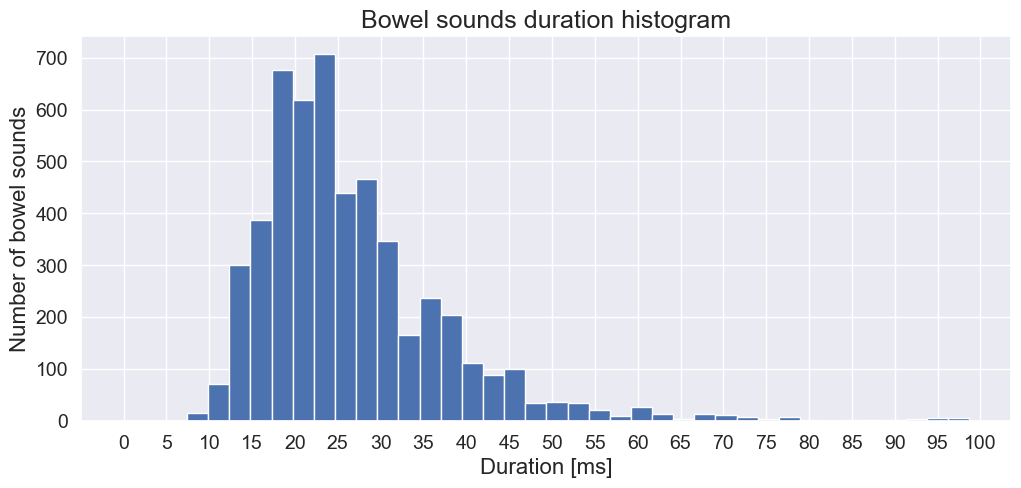

In [27]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Bowel sounds duration histogram")
axes.set_ylabel("Number of bowel sounds")
axes.set_xlabel("Duration [ms]")
axes.locator_params(nbins=25, axis='x')
(all_labels.duration * 1000)[all_labels.duration<.1].hist(bins=40)
plt.savefig("./bs_duration_hist.jpg", dpi=300)

# Histogram of total duration of bowel sounds

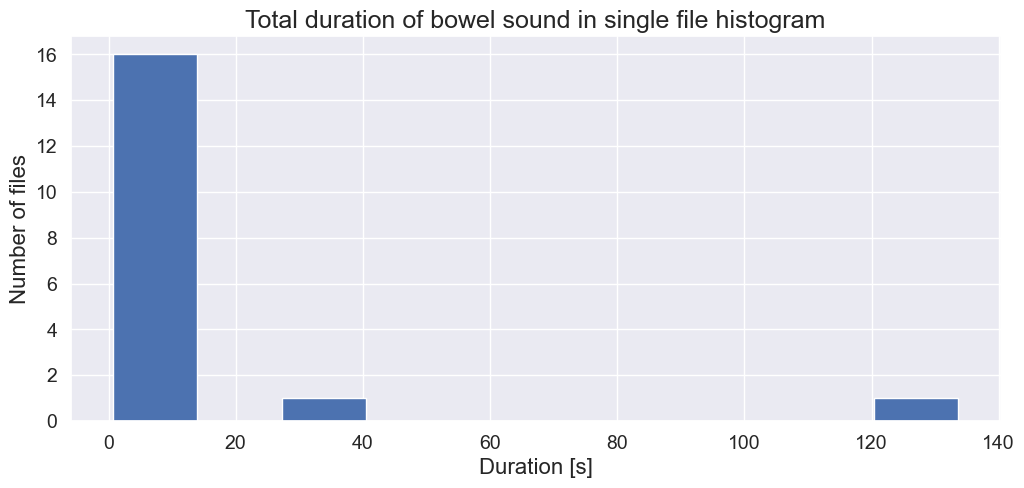

In [28]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Total duration of bowel sound in single file histogram")
axes.set_ylabel("Number of files")
axes.set_xlabel("Duration [s]")
all_labels.groupby("file_name").duration.sum().hist()
plt.savefig("./total_duration_of_bs.jpg", dpi=300)

<AxesSubplot:title={'center':'Bowel sound duration histogram'}, xlabel='Duration [ms]', ylabel='Number of bowel sounds'>

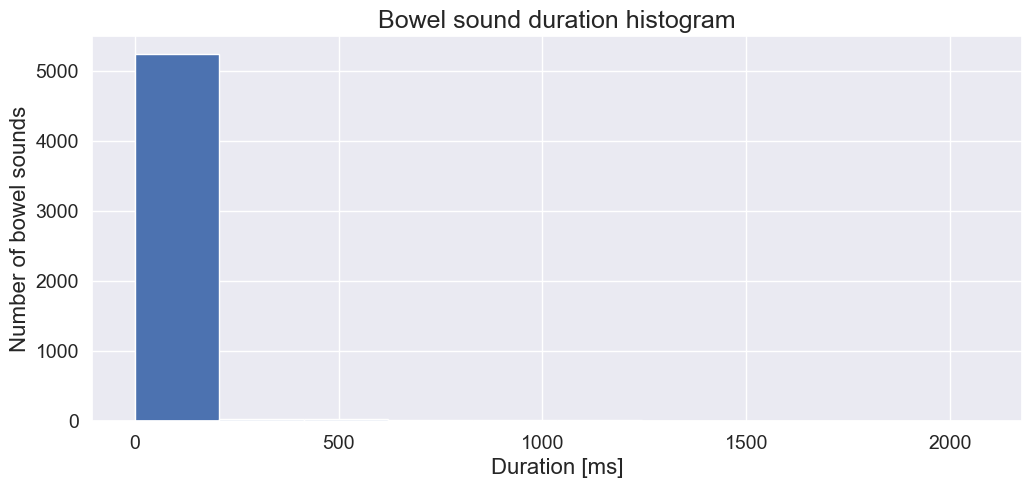

In [29]:
fig, axes = plt.subplots(1, 1, figsize=(12, 5))
axes.set_title("Bowel sound duration histogram")
axes.set_ylabel("Number of bowel sounds")
axes.set_xlabel("Duration [ms]")
# axes.locator_params(nbins=25, axis='x')
(all_labels.duration * 1000).hist()

<AxesSubplot:>

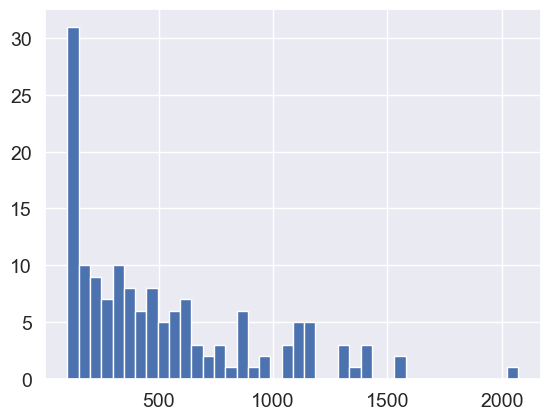

In [30]:
(all_labels.duration * 1000)[all_labels.duration>.1].hist(bins=40)

# Global metrics

In [31]:
(all_labels.duration * 1000).mean()

40.227717468639085

In [32]:
(all_labels.duration * 1000)[all_labels.duration < .1].mean()

26.798844791065093

In [33]:
# total bowel sounds duration
all_labels.duration.sum()

214.85623900000138

In [34]:
#Total audio length
pd.Series(durations).sum()

2990.4615646258508

In [35]:
pd.Series(durations).sum()/60

49.84102607709751

In [36]:
all_labels.duration.sum() / pd.Series(durations).sum() * 100

7.18471829036475

In [37]:
all_labels.shape[0]

5341

# How much labels woudn't be able to be detected

In [38]:
n_labels = all_labels.duration.shape[0]
n_labels

5341

In [52]:

(all_labels.duration * 1000 < 15).sum() / n_labels * 100

7.245834113461899